In [10]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
with open('Standford.txt','r') as file:
    header = file.readline()
    data=[]
    for row in file.readlines()[1:]:
        row = row.split()[1:]
        data.append(row)
    data = np.array(data,dtype='int')

DATA SET:
1. The interview process has been over and for each personality trait of the interviewee, we have rated them out of 10. 
2. The various personality traits  of the interviewee are distant, relaxed, careless, talkative, lazy etc.. There are about 32 personality traits  or variables.
3.  We can see that relaxed, careless and lazy features are correlated because these persons won’t be successful in interview . Since these variables are correlated we can try to form a factor called ‘unsuccessful behaviors’ which will explain the common variance i.e. variance due to correlation among these features.



In [13]:
dataset = pd.DataFrame(data,columns=np.array(header.split(),dtype=object))
dataset.head()

,"""distant""","""talkatv""","""carelss""","""hardwrk""","""anxious""","""agreebl""","""tense""","""kind""","""opposng""","""relaxed""",...,"""lazy""","""coopera""","""quiet""","""organiz""","""criticl""","""lax""","""laidbck""","""withdrw""","""givinup""","""easygon"""
0,3,8,2,7,5,8,4,8,5,7,...,2,7,6,6,4,3,7,2,2,7
1,6,6,2,5,1,8,2,9,2,8,...,5,8,7,4,5,5,7,6,2,8
2,3,7,6,7,8,8,2,8,3,7,...,3,8,4,7,6,6,6,4,3,7
3,7,3,3,5,8,6,7,2,3,3,...,6,6,7,5,5,3,3,7,5,5
4,7,6,7,6,7,8,7,8,5,5,...,5,7,8,6,6,4,4,6,4,7


In [14]:
np.array(list(dataset.columns),dtype=object)

array(['"distant"', '"talkatv"', '"carelss"', '"hardwrk"', '"anxious"',
       '"agreebl"', '"tense"', '"kind"', '"opposng"', '"relaxed"',
       '"disorgn"', '"outgoin"', '"approvn"', '"shy"', '"discipl"',
       '"harsh"', '"persevr"', '"friendl"', '"worryin"', '"respnsi"',
       '"contrar"', '"sociabl"', '"lazy"', '"coopera"', '"quiet"',
       '"organiz"', '"criticl"', '"lax"', '"laidbck"', '"withdrw"',
       '"givinup"', '"easygon"'], dtype=object)

In [15]:
dataset.isnull().sum()

"distant"    0
"talkatv"    0
"carelss"    0
"hardwrk"    0
"anxious"    0
"agreebl"    0
"tense"      0
"kind"       0
"opposng"    0
"relaxed"    0
"disorgn"    0
"outgoin"    0
"approvn"    0
"shy"        0
"discipl"    0
"harsh"      0
"persevr"    0
"friendl"    0
"worryin"    0
"respnsi"    0
"contrar"    0
"sociabl"    0
"lazy"       0
"coopera"    0
"quiet"      0
"organiz"    0
"criticl"    0
"lax"        0
"laidbck"    0
"withdrw"    0
"givinup"    0
"easygon"    0
dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler =  StandardScaler()
dataframe = scaler.fit_transform(dataset)
dataframe = pd.DataFrame(data=dataframe,columns=dataset.columns)
dataframe.head(10)

,"""distant""","""talkatv""","""carelss""","""hardwrk""","""anxious""","""agreebl""","""tense""","""kind""","""opposng""","""relaxed""",...,"""lazy""","""coopera""","""quiet""","""organiz""","""criticl""","""lax""","""laidbck""","""withdrw""","""givinup""","""easygon"""
0,-0.488390,1.265587,-0.788318,0.046253,-0.064666,1.005322,-0.323008,0.826566,0.717681,0.901710,...,-1.149738,0.264088,0.760729,-0.081040,-0.671279,-0.648872,0.985611,-0.989317,-0.430324,0.589672
1,1.187091,0.072391,-0.788318,-1.427667,-2.196418,1.005322,-1.373331,1.623135,-1.160338,1.492145,...,0.441695,1.105648,1.298641,-1.100441,-0.098294,0.553302,0.985611,1.273331,-0.430324,1.216035
2,-0.488390,0.668989,1.428247,0.046253,1.534148,1.005322,-1.373331,0.826566,-0.534332,0.901710,...,-0.619260,1.105648,-0.315095,0.428660,0.474690,1.154389,0.426083,0.142007,0.216515,0.589672
3,1.745584,-1.717404,-0.234177,-1.427667,1.534148,-0.455298,1.252478,-3.952850,-0.534332,-1.460029,...,0.972172,-0.577472,1.298641,-0.590741,-0.098294,-0.648872,-1.252498,1.838993,1.510194,-0.663054
4,1.745584,0.072391,1.982388,-0.690707,1.001210,1.005322,1.252478,0.826566,0.717681,-0.279160,...,0.441695,0.264088,1.836553,-0.081040,0.474690,-0.047785,-0.692971,1.273331,0.863355,0.589672
5,-0.488390,0.072391,2.536529,-0.690707,0.468272,0.275012,-0.848169,-1.563142,-0.534332,0.901710,...,0.972172,-0.577472,-0.315095,-1.100441,0.474690,2.957651,2.104665,-0.989317,0.216515,1.216035
6,1.745584,0.072391,-0.788318,1.520172,1.001210,1.005322,0.727316,0.029996,-1.160338,-0.869595,...,-0.088783,1.105648,0.760729,-0.081040,-0.671279,-0.648872,-1.812025,0.707669,2.157034,-0.036691
7,-1.046883,0.072391,-0.788318,0.783212,-1.663480,0.275012,-0.323008,0.029996,0.091675,1.492145,...,-0.619260,1.105648,0.222817,0.428660,1.047675,-0.648872,0.426083,-0.423655,-1.077164,0.589672
8,0.070104,0.668989,-0.234177,-0.690707,-1.130542,0.275012,-0.848169,0.029996,0.717681,0.311275,...,-0.619260,0.264088,0.222817,-0.081040,-0.098294,-0.648872,-0.692971,0.142007,-0.430324,-0.663054
9,-0.488390,-0.524208,-0.788318,0.783212,-1.130542,0.275012,-0.848169,-1.563142,0.091675,-0.279160,...,-0.088783,0.264088,1.298641,0.938360,1.047675,0.553302,-0.133444,1.273331,-0.430324,0.589672


##STEPS INVOLVED IN FACTOR ANALYSIS
The various steps involved in factor analysis are

1. Bartlett’s Test of Sphericity and KMO Test
2. Determining the number of factors
3. Interpreting the factors


##BARTLETT’S TEST OF SPHERICITY
1. Bartlett’s test checks whether the correlation is present in the given data. 
2. It tests the null hypothesis (H0) that correlation matrix is an Identical matrix. Identical matrix consists all the diagonal elements as 1. So, the null hypothesis assumes that no correlation is present among the variables. We want to reject this null hypothesis because factor analysis aims at explaining the common variance i.e. the variation due to correlation among the variables.
3.  If the p test statistic value is less than 0.05, we can decide that the correlation is not an Identical matrix i.e. correlation is present among the variables with 95% confidence level.



In [18]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo

In [19]:
chi2,p = calculate_bartlett_sphericity(dataframe)
print("Bartlett Sphericity Test")
print("Chi squared value : ",chi2)
print("p value : ",p)

Bartlett Sphericity Test
Chi squared value :  4023.800388782071
p value :  0.0


Since, the p test statistic is less than 0.05, we can conclude that correlation is present among the variables which is a green signal to apply factor analysis.

##KAISER-MEYER-OLKIN (KMO) TEST
1. KMO Test measures the proportion of variance that might be common variance among the variables.
2.  Larger proportions are expected as it represents more correlation is present among the variables there by giving way for application of dimensionality reduction techniques such as Factor Analysis.
3.  KMO score is always between 0 to 1 and values more than 0.6 are much appreciated. We can also say it as a measure of how suited our data is for factor analysis.



In [20]:
kmo_all,kmo_model = calculate_kmo(dataset)
print("KMO Test Statisitc",kmo_model)

KMO Test Statisitc 0.8423659914570744


1. The function will return the proportion of variance for each variables which is stored in the variable ‘kmo_vars’ and the proportion of variance for the whole of our data is stored in ‘kmo_model’.
2.  we can see that our data has an overall proportion of variance of 0.84. It shows that our data has more correlation and dimensionality reduction techniques such as the factor analysis can be applied.



##DETERMINING THE NUMBER OF FACTORS
The number of factors in our dataset is equal to the number of variables in our dataset. All the factors are not gonna provide a significant amount of useful information about the common variance among the variables. So we have to decide the number of factors. The number of factors can be decided on the basis of the amount of common variance the factors explain. In general, we will plot the factors and their eigen values. Eigen values are nothing but the amount of variance the factor explains. We will select the number of factors whose eigen values are greater than 1.

But why should we choose the factors whose eigen values are greater than 1?The answer is very simple. In a standard normal distribution with mean 0 and Standard deviation 1, the variance will be 1. Since we have standard scaled the data the variance of a feature is 1. This is the reason for selecting factors whose eigen values(variance) are greater than 1 i.e. the factors which explain more variance than a single observed variable.



In [21]:
from factor_analyzer import FactorAnalyzer

In [22]:
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=dataframe.shape[1])

In [23]:
fa.fit(dataframe)

FactorAnalyzer(impute='drop', n_factors=32, rotation=None, rotation_kwargs={})

In [24]:
ev,_ = fa.get_eigenvalues()

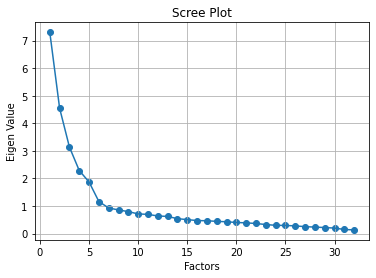

In [25]:
plt.scatter(range(1,dataframe.shape[1]+1),ev)
plt.plot(range(1,dataframe.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

The eigen values function will return the original eigen values and the common factor eigen values. Now, we are going to consider only the original eigen values. From the graph we can see that the eigen values drops below 1 from the 7th factor. So, the optimal number of factors are 6.



INTERPRETING THE FACTORS
Create an optimal number of factors i.e. 6 in our case. Then, we have to interpret the factors by making use of loadings, variance and commonalities.




##LOADINGS


In [26]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(dataset)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [27]:
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa.get_eigenvalues()[0],columns=['EigenValues']))

    EigenValues
0      7.302799
1      4.548282
2      3.139369
3      2.287701
4      1.872118
5      1.162963
6      0.929010
7      0.858765
8      0.797746
9      0.714349
10     0.698059
11     0.639627
12     0.624140
13     0.542297
14     0.507577
15     0.473236
16     0.466436
17     0.444508
18     0.429618
19     0.404030
20     0.389440
21     0.367948
22     0.328853
23     0.300986
24     0.296353
25     0.279923
26     0.252422
27     0.236597
28     0.219695
29     0.201011
30     0.149950
31     0.134192


In [28]:
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa.loadings_,index=dataframe.columns))

                  0         1         2         3         4         5
"distant"  0.609023 -0.006397  0.073777 -0.094768  0.281190  0.137020
"talkatv" -0.759229  0.063613 -0.034403  0.096989  0.146306  0.132109
"carelss"  0.056199 -0.306297  0.070390 -0.035685  0.224019  0.630871
"hardwrk" -0.170320  0.680222  0.142007  0.121206  0.060352 -0.166850
"anxious"  0.170813 -0.022046  0.694277  0.153762  0.208925  0.114961
"agreebl" -0.022760  0.040577 -0.063251  0.631000 -0.193389  0.096209
"tense"    0.163876  0.025240  0.773851  0.013027  0.259396  0.061163
"kind"    -0.120286  0.223273  0.035653  0.606016 -0.177133 -0.220756
"opposng" -0.015363 -0.079381  0.089695 -0.134643  0.644569  0.068352
"relaxed" -0.023995 -0.125786 -0.691357  0.339581 -0.066510  0.045164
"disorgn"  0.017247 -0.368660 -0.023374  0.014760  0.074966  0.774337
"outgoin" -0.829508  0.081210 -0.050024  0.244690  0.013635 -0.020429
"approvn" -0.270433  0.134104 -0.122642  0.495630 -0.127813 -0.032620
"shy"      0.707028 

Loadings indicate how much a factor explains a variable. The loading score will range from -1 to 1.Values close to -1 or 1 indicate that the factor have influence on these variables. Values close to 0 indicates that the factor has lower influencer on the variable.

For example, in Factor 0, we can see that the features ‘distant’ and ‘shy’ talkative have high loadings than other variables. From this we can see that Factor 0, explains the common variance in people who are reserved i.e. the variance among the people who are distant and shy.



##VARIANCE
The amount of variance explained by each factors can be found out using the ‘get_factor_variance’ function.



In [29]:
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3         4         5
Variance          4.563760  3.254322  2.985727  2.448254  2.339837  2.108028
Proportional Var  0.142617  0.101698  0.093304  0.076508  0.073120  0.065876
Cumulative Var    0.142617  0.244315  0.337619  0.414127  0.487247  0.553123


The first row represents the variance explained by each factors. Proportional variance is the variance explained by a factor out of the total variance. Cumulative variance is nothing but the cumulative sum of proportional variances of each factor. In our case, the 6 factors together are able to explain 55.3% of the total variance.

In unrotated cases, the variances would be equal to the eigen values. Rotation changes the distribution of proportional variance but the cumulative variance will remain the same. Oblique rotations allow correlation between the factors while the orthogonal rotations keep the factors uncorrelated.



##COMMUNALITIES
Communality is the proportion of each variable’s variance that can be explained by the factors. Rotations doesn’t have any influence over the communality of the variables.



In [30]:
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa.get_uniquenesses(),index=dataframe.columns,columns=['Uniqueness']))

           Uniqueness
"distant"    0.516784
"talkatv"    0.370076
"carelss"    0.448613
"hardwrk"    0.441951
"anxious"    0.407808
"agreebl"    0.549019
"tense"      0.302465
"kind"       0.487045
"opposng"    0.547148
"relaxed"    0.383848
"disorgn"    0.257811
"outgoin"    0.242343
"approvn"    0.630792
"shy"        0.418993
"discipl"    0.498081
"harsh"      0.514145
"persevr"    0.539329
"friendl"    0.398803
"worryin"    0.398938
"respnsi"    0.423313
"contrar"    0.408556
"sociabl"    0.364925
"lazy"       0.432525
"coopera"    0.547362
"quiet"      0.300147
"organiz"    0.264746
"criticl"    0.571959
"lax"        0.669146
"laidbck"    0.500565
"withdrw"    0.337374
"givinup"    0.558908
"easygon"    0.566556


In [31]:
with np.printoptions(precision=4,suppress=True):
    print(pd.DataFrame(fa.get_communalities(),index=dataframe.columns,columns=['Communalities']))

           Communalities
"distant"       0.483216
"talkatv"       0.629924
"carelss"       0.551387
"hardwrk"       0.558049
"anxious"       0.592192
"agreebl"       0.450981
"tense"         0.697535
"kind"          0.512955
"opposng"       0.452852
"relaxed"       0.616152
"disorgn"       0.742189
"outgoin"       0.757657
"approvn"       0.369208
"shy"           0.581007
"discipl"       0.501919
"harsh"         0.485855
"persevr"       0.460671
"friendl"       0.601197
"worryin"       0.601062
"respnsi"       0.576687
"contrar"       0.591444
"sociabl"       0.635075
"lazy"          0.567475
"coopera"       0.452638
"quiet"         0.699853
"organiz"       0.735254
"criticl"       0.428041
"lax"           0.330854
"laidbck"       0.499435
"withdrw"       0.662626
"givinup"       0.441092
"easygon"       0.433444


The proportion of each variable’s variance that are explained by the factors can be inferred from the above. For example, we could consider the variable ‘talkatv’ about 62.9% of its variance are explained by all the factors together.

That’s all about the factor analysis which can be used to find the underlying variance due to correlation among the observed variables like my heart which finds the creamy layer of the Oreo despite the unappetizing outer crunchy biscuits.

